In [1]:
import csv
import numpy as np
import scipy as sp
import astropy as ap
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("tao_aponte_01_catalogue_3963.csv") #read in dataset
#data

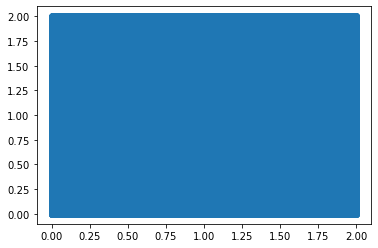

In [3]:
RA = data['Right_Ascension']
DEC = data['Declination']
plt.scatter(RA, DEC)

In [4]:
from astropy.cosmology import WMAP9 #import relevant cosmology (find way to automate this for each dataset)

In [5]:
#Estimate supernova rate per stellar mass using arbitrary parameters for now (added the multiplcation for the units - 10^10  solar mass)

try:
    supernovae_rate_per_stellar_mass = ((((1/100)))*((data['Total_Stellar_Mass'])))*(10**10)/(10**10.5)
except:
    supernovae_rate_per_stellar_mass = ((((1/100)))*((data['total_stellar_mass'])))*(10**10)/(10**10.5)
    
#supernovae_rate_per_stellar_mass

In [6]:
#Estimate supernova rate per star formation rate using arbitrary parameters for now

try:
    supernovae_rate_per_star_formation_rate = ((1/100))*(data['Total_Star_Formation_Rate'])
except:
    supernovae_rate_per_star_formation_rate = ((1/100))*(data['total_star_formation_rate'])
    
#supernovae_rate_per_star_formation_rate

In [34]:
#Estimate TDE rate 
blackholemass = np.array(data['Black_Hole_Mass'])*10**10

bh = np.zeros_like(blackholemass)
print(bh)

#print(blackholemass, bh)

bh[((blackholemass >= 10**6)&(blackholemass <= 10**7))] = 1  
        
try:
    blackhole_rate_per_TDE_rate = ((1/10000))*(bh)
except:
    blackhole_rate_per_TDE_rate = ((1/10000))*(bh)
    
#blackhole_rate_per_TDE_rate
number_of_bh = len(bh[((blackholemass >= 10**6)&(blackholemass <= 10**7))])

[0. 0. 0. ... 0. 0. 0.]


In [8]:
#Insert supernova rates into tables

data.insert(loc=8,
          column='supernovae_rate_per_stellar_mass',
          value=supernovae_rate_per_stellar_mass)        

data.insert(loc=9,
          column='supernovae_rate_per_star_formation_rate',
          value=supernovae_rate_per_star_formation_rate)   

data.insert(loc=10,
          column='blackhole_rate_per_TDE_rate',
          value=blackhole_rate_per_TDE_rate)   

#data

In [9]:
#Finding solid angle for 2 square degree field (automate this for dataset)

from astropy import units as u
theta_RA  = 2 * 3600 * u.arcsec
theta_dec = 2 * 3600 * u.arcsec
Omega = (theta_RA * theta_dec).to(u.steradian)# get rid of unit
z = np.array(data['Redshift_Observed'])
print(Omega)

0.0012184696791468343 sr


In [10]:
#Some useful parameters

try:
    z = data['Redshift_Observed']
except:
    z = data['redshift_observed']
    
bins_z = np.linspace(np.min(z), np.max(z), 100)
binsize = (np.max(z) - np.min(z))/100
digitized_z = np.digitize(z, bins_z) #creates mask for each bin
#print(np.shape(bins_z))

In [77]:
#Calculating Diff Comoving Volume

from scipy import integrate 

for i in range(0, len(bins_z)):
    LAMBDA1 = ((i)*(binsize)-1*(binsize))
    LAMBDA2 = (i*(binsize))                             
    #bin_means_z.append([z[digitized_z == i].mean()])
    #bin_means_tde.append([(tde[digitized_z == i].mean())/(d2-d1)])
comoving_volume = WMAP9.differential_comoving_volume(bins_z)  #Give Volume in Mpc^3 Sr-1
#volume = (integrate.cumtrapz(comoving_volume, bins_z, binsize) * Omega * 100)

#print(comoving_volume)
co_vol_all_sky = comoving_volume*4*np.pi
#print(co_vol_all_sky)

Text(0, 0.5, 'Co Vol All Sky')

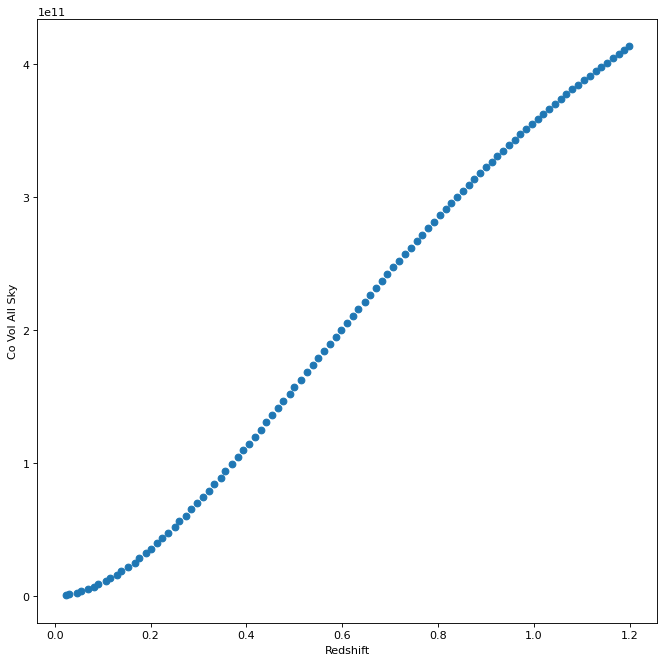

In [72]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, co_vol_all_sky)
plt.xlabel('Redshift')
plt.ylabel('Co Vol All Sky')

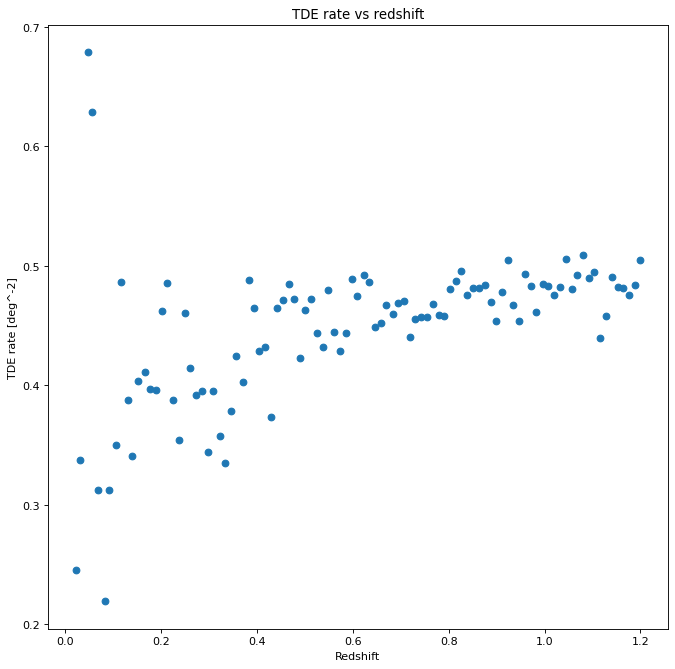

In [61]:
#TDE rate in deg^2

tde = data['blackhole_rate_per_TDE_rate']

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_tde = [tde[digitized_z == i].mean() for i in range(0, len(bins_z))]
#print(np.shape(bin_means_tde))

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, number_of_bh*np.array(bin_means_tde)/4)
plt.xlabel('Redshift')
plt.ylabel('TDE rate [deg^-2]')
plt.title('TDE rate vs redshift')

plt.show()

Text(0.5, 1.0, 'TDE rate vs redshift')

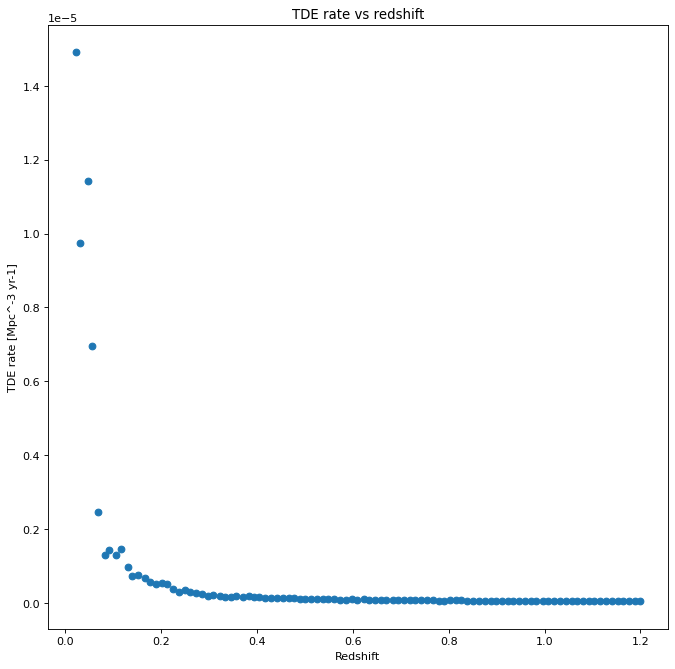

In [36]:
#TDE rate in Mpc^-3 yr-1
    
tde = data['blackhole_rate_per_TDE_rate']
bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_tde = [tde[digitized_z == i].mean() for i in range(0, len(bins_z))]
plt.figure(figsize=(10, 10), dpi=80)

tde_all_sky = np.array(bin_means_tde) * (41253/4)

plt.scatter(bin_means_z, number_of_bh*np.array(tde_all_sky)/np.array(co_vol_all_sky))
            
plt.xlabel('Redshift')
plt.ylabel('TDE rate [Mpc^-3 yr-1]')
plt.title('TDE rate vs redshift')


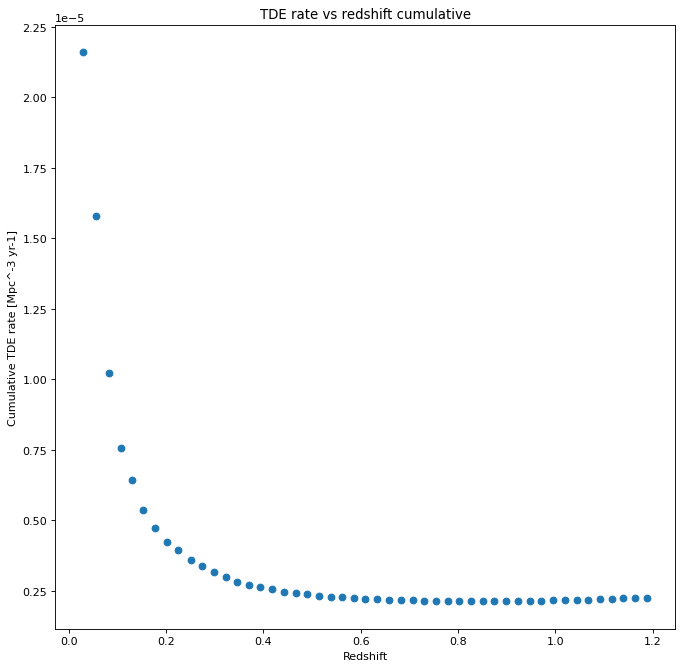

In [55]:
#Cumulative TDE rate in Mpc^-3 yr-1
#CHECK CUMULUTIVE GRAPH

tde = data['blackhole_rate_per_TDE_rate']
bins_z = np.linspace(np.min(z), np.max(z), 100)
bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_tde = [tde[digitized_z == i].mean() for i in range(0, len(bins_z))]

bin_means_tde_cum = [0]
    
for i in range(0, len(bins_z)):
    bin_means_tde_cum.append(bin_means_tde_cum[i-1] + bin_means_tde[i-1])
       
bin_means_tde_cum = np.array(bin_means_tde_cum[1:]) * (41253/4)

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, number_of_bh*(np.array(bin_means_tde_cum)/np.array(co_vol_all_sky)))
plt.xlabel('Redshift')
plt.ylabel('Cumulative TDE rate [Mpc^-3 yr-1]')
plt.title('TDE rate vs redshift cumulative')

plt.show()

(100,)


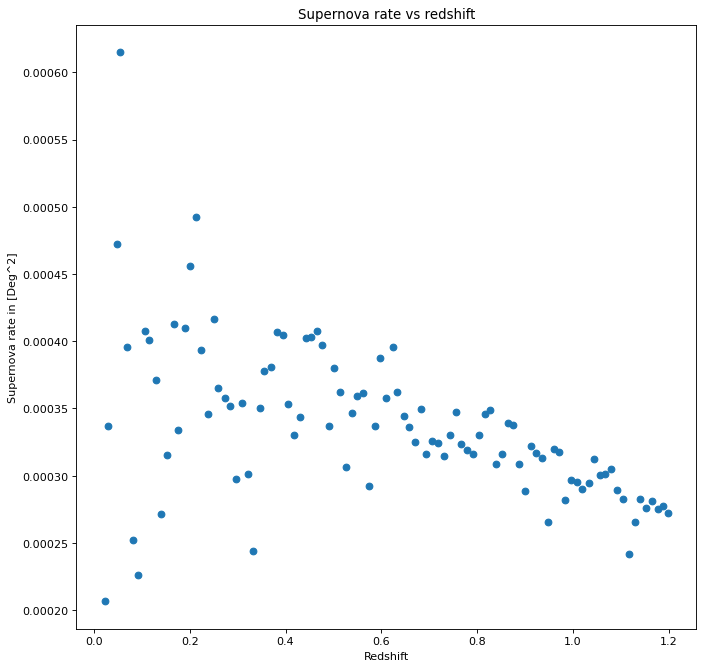

In [62]:
#Supernova rate per stellar mass in deg^2

sm = data['supernovae_rate_per_stellar_mass']

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sm = [sm[digitized_z == i].mean() for i in range(0, len(bins_z))] 
print(np.shape(bin_means_sm))
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_sm)/4)
plt.xlabel('Redshift')
plt.ylabel('Supernova rate in [Deg^2]')
plt.title('Supernova rate vs redshift')

plt.show()

(100,)


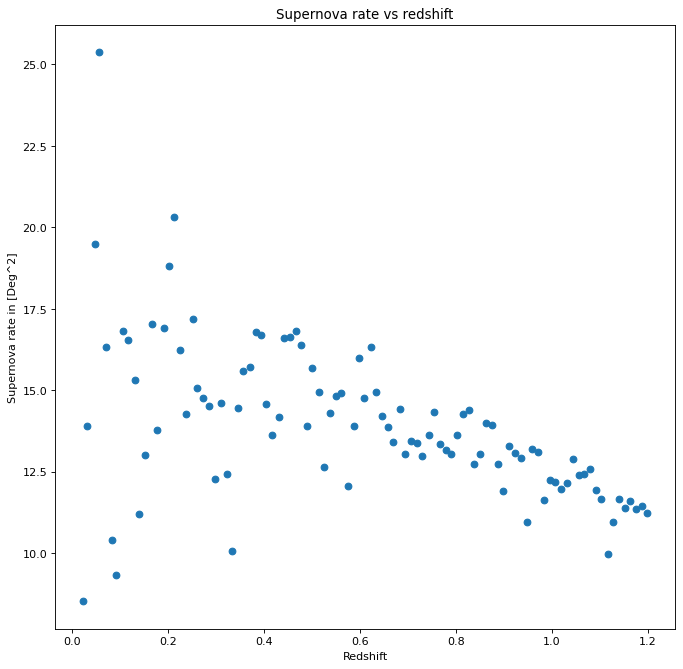

In [58]:
#Supernova rate per stellar mass in 41253 deg^2

sm = data['supernovae_rate_per_stellar_mass']

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sm = [sm[digitized_z == i].mean() for i in range(0, len(bins_z))] 
print(np.shape(bin_means_sm))
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_sm)*(41253/4))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate in [Deg^2]')
plt.title('Supernova rate vs redshift')

plt.show()

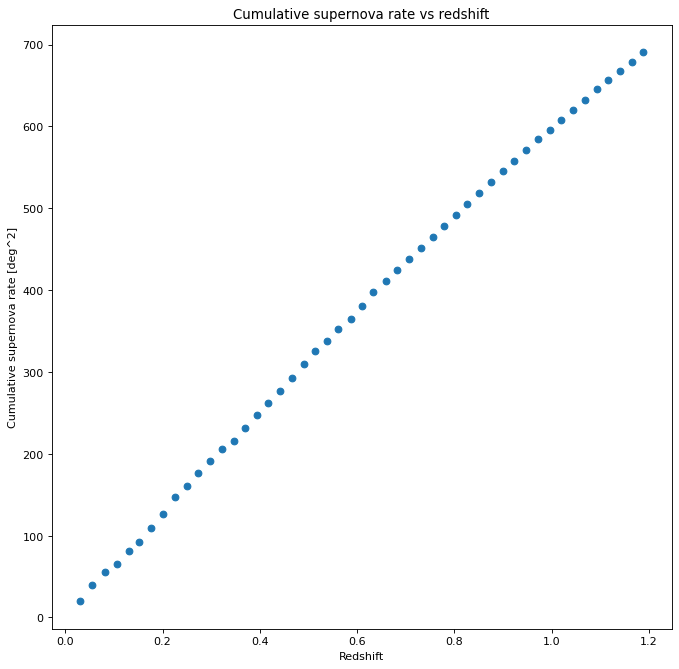

In [67]:
#Cumulutive Supernova rate per stellar mass in 41253 deg^2

try:
    z = data['Redshift_Observed']
except:
    z = data['redshift_observed']
    
sm = data['supernovae_rate_per_stellar_mass']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sm = [sm[digitized_z == i].mean() for i in range(0, len(bins_z))] 

bin_means_sm_cum = [0]
    
for i in range(0, len(bins_z)):
    bin_means_sm_cum.append(bin_means_sm_cum[i-1] + bin_means_sm[i-1])
       
bin_means_sm_cum = np.array(bin_means_sm_cum[1:]) * (41253/4)

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_sm_cum))
plt.xlabel('Redshift')
plt.ylabel('Cumulative supernova rate [deg^2]')
plt.title('Cumulative supernova rate vs redshift')

plt.show()

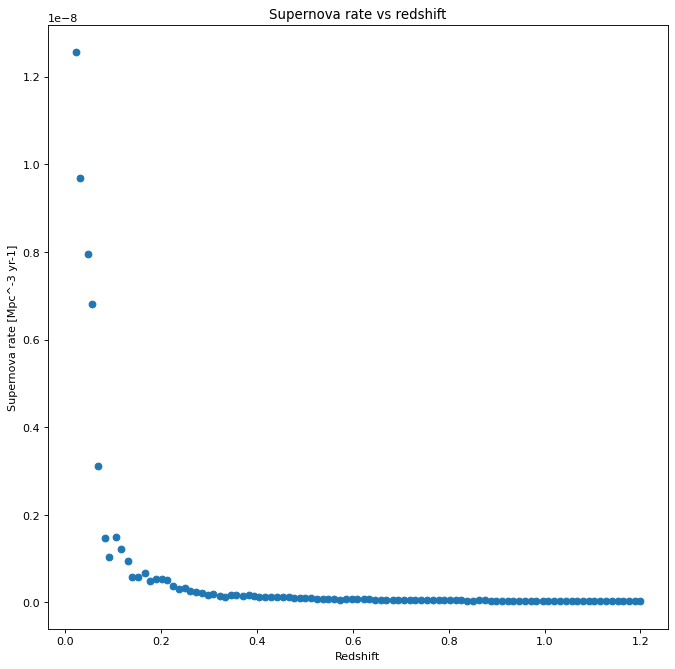

In [56]:
#Supernova rate per stellar mass in Mpc^-3 yr-1

try:
    z = data['Redshift_Observed']
except:
    z = data['redshift_observed']
    
sm = data['supernovae_rate_per_stellar_mass']
bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sm = [sm[digitized_z == i].mean() for i in range(0, len(bins_z))] 

sm_all_sky = np.array(bin_means_sm) * (41253/4)

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, (np.array(sm_all_sky)/np.array(co_vol_all_sky)))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate [Mpc^-3 yr-1]')
plt.title('Supernova rate vs redshift')

plt.show()

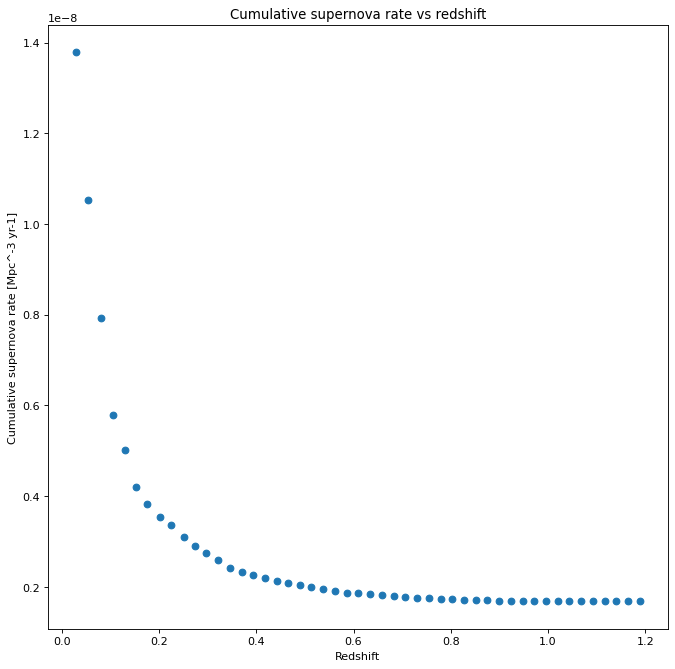

In [78]:
#Cumulative Supernova rate rate in Mpc^-3 yr-1

try:
    z = data['Redshift_Observed']
except:
    z = data['redshift_observed']
    
sm = data['supernovae_rate_per_stellar_mass']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sm = [sm[digitized_z == i].mean() for i in range(0, len(bins_z))] 

bin_means_sm_cum = [0]
    
for i in range(0, len(bins_z)):
    bin_means_sm_cum.append(bin_means_sm_cum[i-1] + bin_means_sm[i-1])
       
bin_means_sm_cum = np.array(bin_means_sm_cum[1:]) * (41253/4)

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, (np.array(bin_means_sm_cum))/np.array(co_vol_all_sky))
plt.xlabel('Redshift')
plt.ylabel('Cumulative supernova rate [Mpc^-3 yr-1]')
plt.title('Cumulative supernova rate vs redshift')

plt.show()

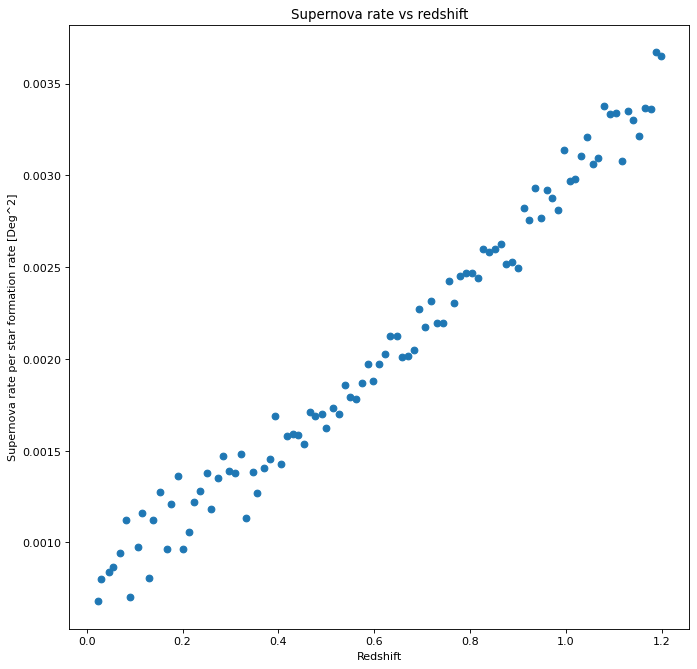

In [68]:
#Supernova rate per star formation rate in deg^2

z = data['Redshift_Observed']
sm = data['supernovae_rate_per_stellar_mass']
sfr = data['supernovae_rate_per_star_formation_rate']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sfr = [sfr[digitized_z == i].mean() for i in range(0, len(bins_z))]

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_sfr)/4)
plt.xlabel('Redshift')
plt.ylabel('Supernova rate per star formation rate [Deg^2]')
plt.title('Supernova rate vs redshift')

plt.show()


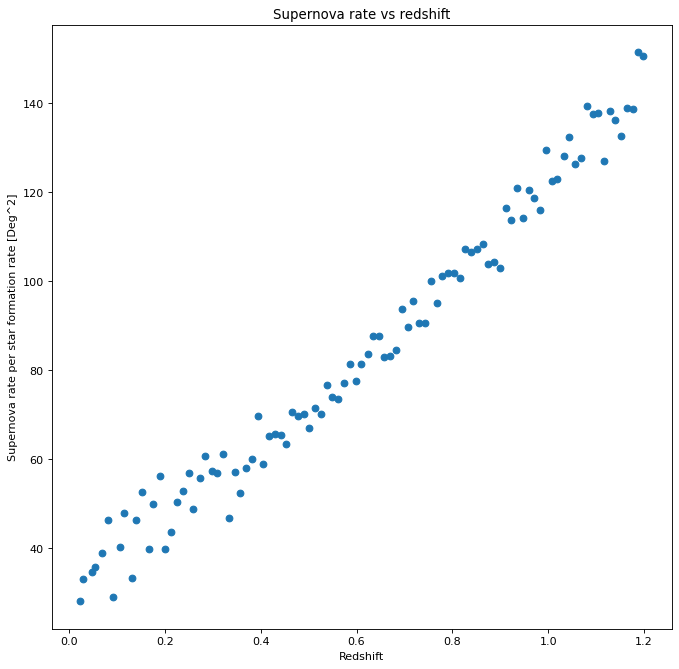

In [79]:
#Supernova rate per star formation rate in 41253 deg^2

z = data['Redshift_Observed']
sm = data['supernovae_rate_per_stellar_mass']
sfr = data['supernovae_rate_per_star_formation_rate']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sfr = [sfr[digitized_z == i].mean() for i in range(0, len(bins_z))]

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_sfr)*(41253/4))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate per star formation rate [Deg^2]')
plt.title('Supernova rate vs redshift')

plt.show()

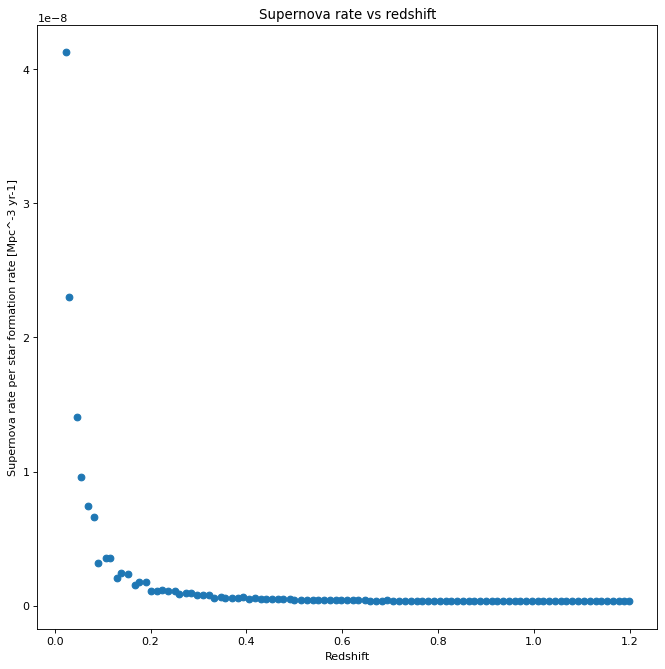

In [70]:
#Supernova rate per star formation rate in Mpc^-3

z = data['Redshift_Observed']
sm = data['supernovae_rate_per_stellar_mass']
sfr = data['supernovae_rate_per_star_formation_rate']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sfr = [sfr[digitized_z == i].mean() for i in range(0, len(bins_z))]

sfr_all_sky = np.array(bin_means_sfr) * (41253/4)

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(sfr_all_sky)/np.array(co_vol_all_sky))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate per star formation rate [Mpc^-3 yr-1]')
plt.title('Supernova rate vs redshift')

plt.show()

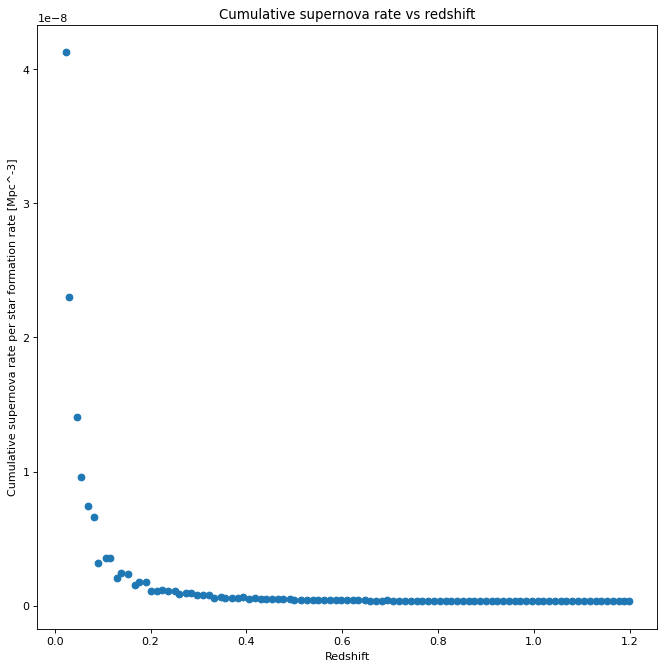

In [71]:
#Supernova rate per star formation rate in Mpc^-3

z = data['Redshift_Observed']
sm = data['supernovae_rate_per_stellar_mass']
sfr = data['supernovae_rate_per_star_formation_rate']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sfr = [sfr[digitized_z == i].mean() for i in range(0, len(bins_z))]

bin_means_sfr_cum = [0]
    
for i in range(0, len(bins_z)):
    bin_means_sfr_cum.append(bin_means_sfr_cum[i-1] + bin_means_sfr[i-1])
       
bin_means_sfr_cum = np.array(bin_means_sfr_cum[1:]) * (41253/4)

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(sfr_all_sky)/np.array(co_vol_all_sky))
plt.xlabel('Redshift')
plt.ylabel('Cumulative supernova rate per star formation rate [Mpc^-3]')
plt.title('Cumulative supernova rate vs redshift')

plt.show()

In [28]:
#Plot of all three in Mpc^-3

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_tde)/10**4*np.array(volume), color='r')
plt.scatter(bin_means_z, np.array(bin_means_sm)/10**4*np.array(volume))
plt.scatter(bin_means_z, np.array(bin_means_sfr)/10**4*np.array(volume), color='g')
plt.xlabel('Redshift')
plt.ylabel('SFR(green), SM(blue), TDE(red) rate per [Mpc^-3]')
plt.title('How SFR, SM, TDE rates vary with redshift')

plt.show()

NameError: name 'volume' is not defined

<Figure size 800x800 with 0 Axes>

In [ ]:
#Plot of all three cumulative in Mpc^-3

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_tde_cum)/10**4*np.array(volume), color='r')
plt.scatter(bin_means_z, np.array(bin_means_sm_cum)/10**4*np.array(volume))
plt.scatter(bin_means_z, np.array(bin_means_sfr_cum)/10**4*np.array(volume), color='g')
plt.xlabel('Redshift')
plt.ylabel('SFR(green), SM(blue), TDE(red) cumulative rate per [Mpc^-3]')
plt.title('How SFR, SM, TDE rates vary with redshift')

plt.show()